# Using basic features

In [81]:
from fastai.tabular.all import *
import os 
import pandas as pd

In [82]:
data = pd.read_csv(os.path.join('..', 'input', 'train.csv'))

In [83]:
data = data.drop(columns=  ['pre requisite', 'concept', 'pre requisite taxonomy','concept taxonomy'])
data['label'] = data['label'].astype('category')

In [84]:
splits = RandomSplitter(valid_pct=0.2)(range_of(data))

In [85]:
to = TabularPandas(data, procs=[Categorify, FillMissing,Normalize],
                   cont_names = [col for col in data.columns if col not in ['label']],
                   y_names='label',
                   splits=splits)

In [86]:
to.xs.iloc[:2]


,title 12,title 12.1,title 12.2,title 12.3,title 12.4,title 12.5,title 12.6,title 12.7,title 12.8,title 12.9,...,BOW 656,BOW 657,BOW 658,BOW 659,BOW 660,BOW 661,BOW 662,BOW 663,BOW 664,BOW 665
504,0.916657,-1.026096,-1.902946,-1.895747,-1.763421,-1.616443,-1.195742,0.186429,0.629783,0.957182,...,-0.041551,-0.059895,-0.133174,-0.100165,-0.10795,-0.076437,-0.07713,-0.296635,-0.116563,-0.096318
1527,0.344338,1.325571,0.351219,0.354535,0.426706,0.454704,0.403439,-0.614392,-0.536984,-0.543991,...,-0.041551,-0.059895,-0.133174,-0.100165,-0.10795,-0.076437,-0.07713,-0.296635,-0.116563,-0.096318


In [87]:
dls = to.dataloaders(bs=64)

In [88]:
learn = tabular_learner(dls, metrics=[accuracy, F1Score()])

In [89]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.578705,0.502656,0.774597,0.741803,00:00
1,0.439156,0.578454,0.765653,0.719486,00:00
2,0.330821,0.609222,0.796064,0.759494,00:00
3,0.242825,0.641281,0.778175,0.726872,00:00
4,0.188765,0.643456,0.790698,0.741722,00:00


In [91]:

test = pd.read_csv(os.path.join('..', 'input', 'test.csv'))
test_data = test.drop(columns=  ['ID', 'pre requisite', 'concept', 'pre requisite taxonomy','concept taxonomy'])
# test_data.columns
test_df = test_data.copy()
test_dl = learn.dls.test_dl(test_df)
preds = learn.get_preds(dl=test_dl)
test_labels = torch.argmax(preds[0], dim=1)
# create a dataframe with the predictions
df = pd.DataFrame(test_labels.numpy())
df.columns = ['label']
df['ID'] = test['ID']
df = df[['ID', 'label']]
df.to_csv(os.path.join('..', 'output', 'fastai_preds_2.csv'), index=False)

# Using GPT Embeddings

In [104]:
# load torch tensors

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from fastai.tabular.all import *
import os 
import pandas as pd

x = torch.load(os.path.join('..', 'output', 'embeddings', 'train_embeds_transcripts_concatenated.pt'))
y = x.to_list()
y = [t.tolist() for t in y]
df = pd.DataFrame(y)
column_names = [f"embeds_{i}" for i in range(1536)]  # Replace with your column names
df.columns = column_names
train = pd.read_csv(os.path.join('..', 'input', 'train.csv'))
data = pd.concat([train, df], axis=1)
len(data.columns)

2522

In [105]:
# data = pd.read_csv(os.path.join('..', 'input', 'train.csv'))
data = data.drop(columns=  ['pre requisite', 'concept', 'pre requisite taxonomy','concept taxonomy'])
data['label'] = data['label'].astype('category')
splits = RandomSplitter(valid_pct=0.2)(range_of(data))
to = TabularPandas(data, procs=[Categorify, FillMissing,Normalize],
                   cont_names = [col for col in data.columns if col not in ['label']],
                   y_names='label',
                   splits=splits)
to.xs.iloc[:2]

dls = to.dataloaders(bs=64)
learn = tabular_learner(dls, metrics=[accuracy, F1Score()])
learn.fit_one_cycle(1)


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.540995,0.486030,0.779964,0.735484,00:00


In [106]:

x = torch.load(os.path.join('..', 'output', 'embeddings', 'test_embeds_transcripts_concatenated.pt'))
y = x.to_list()
y = [t.tolist() for t in y]
df = pd.DataFrame(y)
column_names = [f"embeds_{i}" for i in range(1536)]  # Replace with your column names
df.columns = column_names
test = pd.read_csv(os.path.join('..', 'input', 'test.csv'))
test_data = pd.concat([test, df], axis=1)
test_data = test_data.drop(columns=  ['ID', 'pre requisite', 'concept', 'pre requisite taxonomy','concept taxonomy'])
# test_data.columns

In [107]:
test_df = test_data.copy()
test_dl = learn.dls.test_dl(test_df)

In [108]:
preds = learn.get_preds(dl=test_dl)

In [109]:
test_labels = torch.argmax(preds[0], dim=1)

In [110]:
# create a dataframe with the predictions
df = pd.DataFrame(test_labels.numpy())
df.columns = ['label']
df['ID'] = test['ID']
df = df[['ID', 'label']]
df.to_csv(os.path.join('..', 'output', 'fastai_preds.csv'), index=False)

## Sub exp 

Dont use their features at all

epoch,train_loss,train_accuracy,train_f1_score,valid_loss,valid_accuracy,valid_f1_score,time
0,0.589258,0.704963,0.658511,0.531466,0.722719,0.653244,00:01
1,0.490752,0.797335,0.756488,0.482101,0.744186,0.665105,00:01
2,0.423507,0.831342,0.794628,0.509757,0.751342,0.680460,00:01
3,0.383633,0.835938,0.800000,0.470749,0.772809,0.710706,00:01
4,0.337335,0.867188,0.834763,0.453921,0.805009,0.743529,00:01
5,0.314226,0.871324,0.839633,0.452851,0.797853,0.741419,00:01
6,0.286175,0.888787,0.860438,0.457669,0.805009,0.738609,00:01
7,0.250134,0.916360,0.896355,0.506329,0.785331,0.727273,00:01
8,0.238587,0.900735,0.876147,0.430169,0.837209,0.782816,00:01
9,0.216260,0.920956,0.900922,0.476989,0.806798,0.752294,00:01


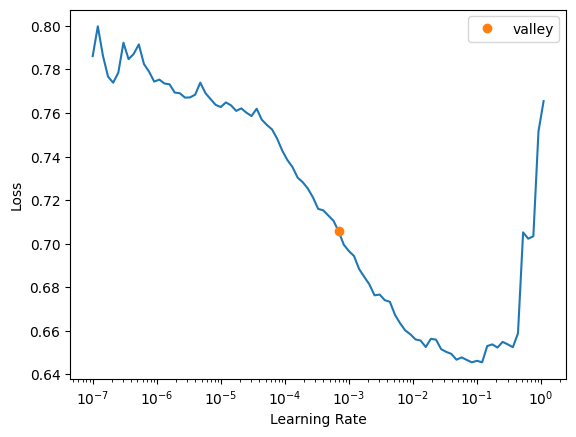

In [26]:
# load torch tensors

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from fastai.tabular.all import *
import os 
import pandas as pd

x = torch.load(os.path.join('..', 'output', 'embeddings', 'train_embeds_videonames_transcripts_concatenated.pt'))
y = x.to_list()
y = [t.tolist() for t in y]
df = pd.DataFrame(y)
column_names = [f"embeds_{i}" for i in range(1536)]  # Replace with your column names
df.columns = column_names
train = pd.read_csv(os.path.join('..', 'input', 'train.csv'))
data = pd.concat([train['label'].to_frame(), df], axis=1)
# len(data.columns)
# data = data.drop(columns=  ['pre requisite', 'concept', 'pre requisite taxonomy','concept taxonomy'])
data['label'] = data['label'].astype('category')
splits = RandomSplitter(valid_pct=0.2)(range_of(data))
to = TabularPandas(data, procs=[Categorify, FillMissing,Normalize],
                   cont_names = [col for col in data.columns if col not in ['label']],
                   y_names='label',
                   splits=splits)
to.xs.iloc[:2]

dls = to.dataloaders(bs=64)
learn = tabular_learner(dls, metrics=[accuracy, F1Score()])
learn.recorder.train_metrics = True
learn.recorder.valid_metrics = True
# learn.fit_one_cycle(10)


lr = learn.lr_find()
lr = lr.valley
learn.fit(10, lr = lr)


x = torch.load(os.path.join('..', 'output', 'embeddings', 'test_embeds_videonames_transcripts_concatenated.pt'))
y = x.to_list()
y = [t.tolist() for t in y]
df = pd.DataFrame(y)
column_names = [f"embeds_{i}" for i in range(1536)]  # Replace with your column names
df.columns = column_names
test = pd.read_csv(os.path.join('..', 'input', 'test.csv'))
# test_data = pd.concat([test['label'].to_frame(), df], axis=1)
test_data = df
# test_data = test_data.drop(columns=  ['ID', 'pre requisite', 'concept', 'pre requisite taxonomy','concept taxonomy'])
# test_data.columns
test_df = test_data.copy()
test_dl = learn.dls.test_dl(test_df)
preds = learn.get_preds(dl=test_dl)
test_labels = torch.argmax(preds[0], dim=1)
# create a dataframe with the predictions
df = pd.DataFrame(test_labels.numpy())
df.columns = ['label']
df['ID'] = test['ID']
df = df[['ID', 'label']]
df.to_csv(os.path.join('..', 'output', 'fastai_preds-3.csv'), index=False)

### Subsub experiment

In [12]:
# load torch tensors

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from fastai.tabular.all import *
import os 
import pandas as pd

x = torch.load(os.path.join('..', 'output', 'embeddings', 'train_embeds_videonames_extracted_concatenated.pt'))
y = x.to_list()
y = [t.tolist() for t in y]
df = pd.DataFrame(y)
column_names = [f"embeds_{i}" for i in range(1536)]  # Replace with your column names
df.columns = column_names
train = pd.read_csv(os.path.join('..', 'input', 'train.csv'))
data = pd.concat([train['label'].to_frame(), df], axis=1)
# len(data.columns)
# data = data.drop(columns=  ['pre requisite', 'concept', 'pre requisite taxonomy','concept taxonomy'])
data['label'] = data['label'].astype('category')
splits = RandomSplitter(valid_pct=0.2)(range_of(data))
to = TabularPandas(data, procs=[Categorify, FillMissing,Normalize],
                   cont_names = [col for col in data.columns if col not in ['label']],
                   y_names='label',
                   splits=splits)
to.xs.iloc[:2]

dls = to.dataloaders(bs=64)
learn = tabular_learner(dls, metrics=[accuracy, F1Score()])

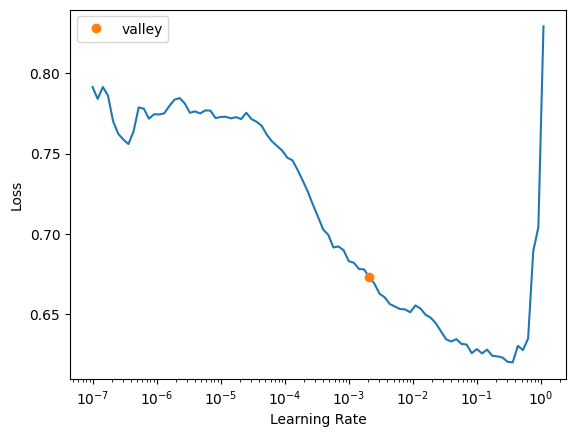

In [13]:
lr = (learn.lr_find())

In [6]:
# load torch tensors

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from fastai.tabular.all import *
import os 
import pandas as pd

x = torch.load(os.path.join('..', 'output', 'embeddings', 'train_embeds_videonames_extracted_concatenated.pt'))
y = x.to_list()
y = [t.tolist() for t in y]
df = pd.DataFrame(y)
column_names = [f"embeds_{i}" for i in range(1536)]  # Replace with your column names
df.columns = column_names
train = pd.read_csv(os.path.join('..', 'input', 'train.csv'))
data = pd.concat([train['label'].to_frame(), df], axis=1)
# len(data.columns)
# data = data.drop(columns=  ['pre requisite', 'concept', 'pre requisite taxonomy','concept taxonomy'])
data['label'] = data['label'].astype('category')
splits = RandomSplitter(valid_pct=0.2)(range_of(data))
to = TabularPandas(data, procs=[Categorify, FillMissing,Normalize],
                   cont_names = [col for col in data.columns if col not in ['label']],
                   y_names='label',
                   splits=splits)
to.xs.iloc[:2]

dls = to.dataloaders(bs=64)
learn = tabular_learner(dls, metrics=[accuracy, F1Score()])
learn.fit(20, lr = 0.0005)


x = torch.load(os.path.join('..', 'output', 'embeddings', 'test_embeds_videonames_extracted_concatenated.pt'))
y = x.to_list()
y = [t.tolist() for t in y]
df = pd.DataFrame(y)
column_names = [f"embeds_{i}" for i in range(1536)]  # Replace with your column names
df.columns = column_names
test = pd.read_csv(os.path.join('..', 'input', 'test.csv'))
# test_data = pd.concat([test['label'].to_frame(), df], axis=1)
test_data = df
# test_data = test_data.drop(columns=  ['ID', 'pre requisite', 'concept', 'pre requisite taxonomy','concept taxonomy'])
# test_data.columns
test_df = test_data.copy()
test_dl = learn.dls.test_dl(test_df)
preds = learn.get_preds(dl=test_dl)
test_labels = torch.argmax(preds[0], dim=1)
# create a dataframe with the predictions
df = pd.DataFrame(test_labels.numpy())
df.columns = ['label']
df['ID'] = test['ID']
df = df[['ID', 'label']]
df.to_csv(os.path.join('..', 'output', 'fastai_preds-3.csv'), index=False)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.566235,0.472665,0.760286,0.708696,00:00
1,0.439326,0.451869,0.783542,0.737527,00:00
2,0.351284,0.435684,0.790698,0.740576,00:00
3,0.283232,0.423885,0.821109,0.775785,00:00
4,0.226292,0.462915,0.806798,0.764192,00:00
5,0.190767,0.472355,0.810376,0.765487,00:00
6,0.157304,0.454859,0.810376,0.767544,00:00
7,0.132296,0.433029,0.815742,0.769575,00:00
8,0.110114,0.501182,0.813953,0.764706,00:00
9,0.101377,0.517038,0.805009,0.753950,00:00


## Exp 3
Not using BOW features

In [11]:
# load torch tensors

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from fastai.tabular.all import *
import os 
import pandas as pd

x = torch.load(os.path.join('..', 'output', 'embeddings', 'train_embeds_videonames_extracted_concatenated.pt'))
y = x.to_list()
y = [t.tolist() for t in y]
df = pd.DataFrame(y)
column_names = [f"embeds_{i}" for i in range(1536)]  # Replace with your column names
df.columns = column_names
train = pd.read_csv(os.path.join('..', 'input', 'train.csv'))
data = pd.concat([train, df], axis=1)
len(data.columns)
# data = pd.read_csv(os.path.join('..', 'input', 'train.csv'))
data = data.drop(columns=  ['pre requisite', 'concept', 'pre requisite taxonomy','concept taxonomy'])
data = data.drop(columns=  [x for x in data.columns if 'BOW' in x])
print(len(data.columns))
data['label'] = data['label'].astype('category')
splits = RandomSplitter(valid_pct=0.2)(range_of(data))
to = TabularPandas(data, procs=[Categorify, FillMissing,Normalize],
                   cont_names = [col for col in data.columns if col not in ['label']],
                   y_names='label',
                   splits=splits)


dls = to.dataloaders(bs=64)
learn = tabular_learner(dls, metrics=[accuracy, F1Score()])
learn.fit_one_cycle(5)


x = torch.load(os.path.join('..', 'output', 'embeddings', 'test_embeds_videonames_extracted_concatenated.pt'))
y = x.to_list()
y = [t.tolist() for t in y]
df = pd.DataFrame(y)
column_names = [f"embeds_{i}" for i in range(1536)]  # Replace with your column names
df.columns = column_names
test = pd.read_csv(os.path.join('..', 'input', 'test.csv'))
test_data = pd.concat([test, df], axis=1)
test_data = test_data.drop(columns=  ['ID', 'pre requisite', 'concept', 'pre requisite taxonomy','concept taxonomy'])
test_data = test_data.drop(columns=  [x for x in data.columns if 'BOW' in x])

# test_data.columns
test_df = test_data.copy()
test_dl = learn.dls.test_dl(test_df)
preds = learn.get_preds(dl=test_dl)
test_labels = torch.argmax(preds[0], dim=1)
# create a dataframe with the predictions
df = pd.DataFrame(test_labels.numpy())
df.columns = ['label']
df['ID'] = test['ID']
df = df[['ID', 'label']]
df.to_csv(os.path.join('..', 'output', 'fastai_preds-4.csv'), index=False)

1853


RuntimeError: Exception occured in `TrainEvalCallback` when calling event `before_fit`:
	CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

# Exp 4

Use both the embeddings

epoch,train_loss,train_accuracy,train_f1_score,valid_loss,valid_accuracy,valid_f1_score,time
0,0.569530,0.706342,0.656267,0.454703,0.801431,0.724566,00:00
1,0.461131,0.839614,0.811453,0.406105,0.808587,0.762749,00:00
2,0.384351,0.886949,0.865132,0.369142,0.844365,0.800915,00:00
3,0.322913,0.918199,0.900891,0.398577,0.828265,0.779817,00:00
4,0.268699,0.937960,0.923858,0.402351,0.822898,0.769231,00:00
5,0.223136,0.958180,0.948675,0.381887,0.847943,0.796163,00:00
6,0.184837,0.967371,0.959544,0.402671,0.844365,0.793349,00:00
7,0.155053,0.973346,0.966781,0.434079,0.842576,0.785366,00:00
8,0.129043,0.979779,0.974828,0.451688,0.856887,0.812207,00:00
9,0.107396,0.982996,0.978893,0.435534,0.849732,0.800948,00:00


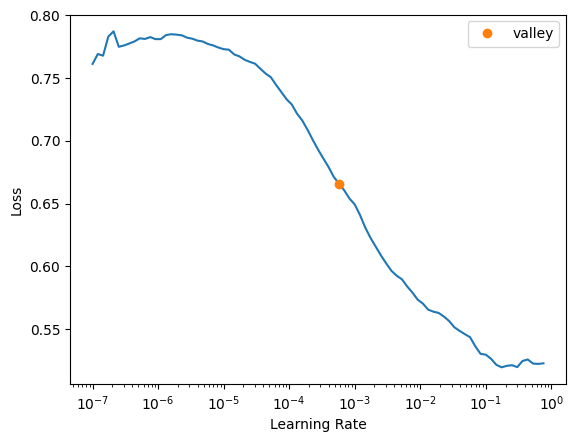

In [22]:
# load torch tensors

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from fastai.tabular.all import *
import os 
import pandas as pd

x = torch.load(os.path.join('..', 'output', 'embeddings', 'train_embeds_videonames_extracted_concatenated.pt'))
y = x.to_list()
y = [t.tolist() for t in y]
x = torch.load(os.path.join('..', 'output', 'embeddings', 'train_embeds_videonames_concatenated.pt'))
z = x.to_list()
z = [t.tolist() for t in z]
y = [y[i] + z[i] for i in range(len(y))]
df = pd.DataFrame(y)
column_names = [f"embeds_{i}" for i in range(3072)]  # Replace with your column names
df.columns = column_names
train = pd.read_csv(os.path.join('..', 'input', 'train.csv'))
data = pd.concat([train['label'].to_frame(), df], axis=1)
# len(data.columns)
# data = data.drop(columns=  ['pre requisite', 'concept', 'pre requisite taxonomy','concept taxonomy'])
data['label'] = data['label'].astype('category')
splits = RandomSplitter(valid_pct=0.2)(range_of(data))
to = TabularPandas(data, procs=[Categorify, FillMissing,Normalize],
                   cont_names = [col for col in data.columns if col not in ['label']],
                   y_names='label',
                   splits=splits)
to.xs.iloc[:2]

dls = to.dataloaders(bs=128)
learn = tabular_learner(dls, metrics=[accuracy, F1Score()])
learn.recorder.train_metrics = True
learn.recorder.valid_metrics = True

lr = learn.lr_find()
lr = lr.valley
learn.fit(10, lr = lr)


x = torch.load(os.path.join('..', 'output', 'embeddings', 'test_embeds_videonames_extracted_concatenated.pt'))
y = x.to_list()
y = [t.tolist() for t in y]
x = torch.load(os.path.join('..', 'output', 'embeddings', 'test_embeds_videonames_concatenated.pt'))
z = x.to_list()
z = [t.tolist() for t in z]
y = [y[i] + z[i] for i in range(len(y))]
df = pd.DataFrame(y)
column_names = [f"embeds_{i}" for i in range(3072)]  # Replace with your column names
df.columns = column_names
test = pd.read_csv(os.path.join('..', 'input', 'test.csv'))
# test_data = pd.concat([test['label'].to_frame(), df], axis=1)
test_data = df
# test_data = test_data.drop(columns=  ['ID', 'pre requisite', 'concept', 'pre requisite taxonomy','concept taxonomy'])
# test_data.columns
test_df = test_data.copy()
test_dl = learn.dls.test_dl(test_df)
preds = learn.get_preds(dl=test_dl)
test_labels = torch.argmax(preds[0], dim=1)
# create a dataframe with the predictions
df = pd.DataFrame(test_labels.numpy())
df.columns = ['label']
df['ID'] = test['ID']
df = df[['ID', 'label']]
df.to_csv(os.path.join('..', 'output', 'fastai_preds-5.csv'), index=False)